# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [3]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from math import sqrt

## 1. Gamma Distribution with itakura-saito as Bregman Divergenses

### 1.1 Selecting best way to represent Gamma Distribution with Non- negative Values

Gamma Distribution from definition does no take negative values.

/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


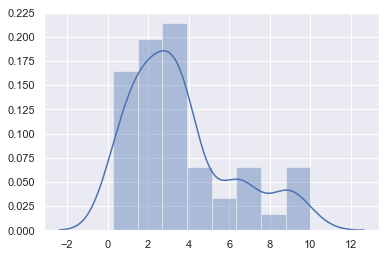

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
rs = RandomState(76321654)
shape, scale = 1.5, 2.5  
V = rs.gamma(shape,scale ,10000).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(V[4])

### 1.2 Test NMF for Data coming from Gamma Distribution

In [24]:
import scipy
rs = RandomState(76321654)
shape, scale = 1.5, 2.5  
V = rs.gamma(shape,scale ,10000).reshape(200,50)
n = 10
gamma = scipy.stats.distributions.gamma

#### LOG Likelihood 

In [51]:
def neg_log_gamma(V,W,H):
    logs_likelihoods = gamma.logpdf(V, W.dot(H))
    neg_logs = - logs_likelihoods
    return np.sum(neg_logs)

### Sklearn Implementation

In [52]:
rs = RandomState(76321654)
nmfS = nmfsk(n_components=n,random_state=rs)
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_

diffS = neg_log_gamma(V, Ws, Hs)
print('Negative Log Likelihood Between Sklearn Results and V :' + str(diffS))

Negative Log Likelihood Between Sklearn Results and V :14382.666843330338


### My Implementation Gaussian

In [54]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gaussian')
W, H = nmfM.fit_transform(V)
diffM = neg_log_gamma(V, W ,H)
print('Negative Log Likelihood Between Sklearn Results Between My Results and V :' + str(diffM))

Negative Log Likelihood Between Sklearn Results Between My Results and V :14525.330865777883


### My Implementation Poisson 

In [55]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'poisson')
W, H = nmfM.fit_transform(V)
diffM = neg_log_gamma(V, W ,H)
print('Negative Log Likelihood Between Sklearn Results Between My Results and V :' + str(diffM))

Negative Log Likelihood Between Sklearn Results Between My Results and V :14663.39652961245


### My Implementation Gamma

In [56]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gamma')
W, H = nmfM.fit_transform(V)
diffM = neg_log_gamma(V, W ,H)
print('Negative Log Likelihood Between Sklearn Results Between My Results and V :' + str(diffM))

Negative Log Likelihood Between Sklearn Results Between My Results and V :19745.054363037045


### Combination of My and Sklearn

In [57]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'gaussian')
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_

diffM2 =mean_squared_error(V, W2.dot(H2))
print('Mean Squared Error Between My Results and V :' + str(diffM2))

Mean Squared Error Between My Results and V :0.07284488422902462


### Compare the three Approaches

In [58]:
errorssk = np.zeros(50)
errorssk2 = np.zeros(50)
errorsmy = np.zeros(50)
errorsmy2 = np.zeros(50)

lsk = np.zeros(50)
lsk2 = np.zeros(50)
lmy = np.zeros(50)
lmy2 = np.zeros(50)



# Compare with normal 
errorsmyNormal = np.zeros(50)
lmyNormal = np.zeros(50)

# Compare with poisson 
errorsmyPo = np.zeros(50)
lmyPo = np.zeros(50)


for n in range(1, 51):
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Sklearn with itakura-saito
    rs = RandomState(76321654)
    nmfS2 = nmfsk(n_components=n,random_state=rs,  solver='mu', beta_loss='itakura-saito')
    Ws2 = nmfS2.fit_transform(V)
    Hs2 = nmfS2.components_

    
    
    #My 
    
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'gamma')
    W, H = nmfM.fit_transform(V)
    
    # My with Normal
    rs = RandomState(76321654)
    nmfMNormal = nmfmy(n_components=n,random_state=rs,  distribution = 'gaussian')
    Wnormal, Hnormal = nmfMNormal.fit_transform(V)
    
    # My with Poisson
    rs = RandomState(76321654)
    nmfPo = nmfmy(n_components=n,random_state=rs,  distribution = 'poisson')
    Wpo, Hpo = nmfPo.fit_transform(V)
   
    
    #Combination
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'gamma')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
    diffS2 = mean_squared_error(V, Ws2.dot(Hs2))
    errorssk2[n-1] = diffS2
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
    diffMnormal = mean_squared_error(V, Wnormal.dot(Hnormal))
    errorsmyNormal[n-1] = diffMnormal
    
    diffMPo = mean_squared_error(V, Wpo.dot(Hpo))
    errorsmyPo[n-1] = diffMPo
    
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsmy2[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_gamma(V, Ws, Hs)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_gamma(V, Ws2, Hs2)
    lsk2[n-1] = diffS2 / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_gamma(V, W, H)
    lmy[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffMNormal = neg_log_gamma(V, Wnormal, Hnormal)
    lmyNormal[n-1] = diffMNormal / (V.shape[0] * V.shape[1])
    
    diffMpo = neg_log_gamma(V, Wpo, Hpo)
    lmyPo[n-1] = diffMpo / (V.shape[0] * V.shape[1])
    
    diffM2 = neg_log_gamma(V, W2 , H2)
    lmy2[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    

/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached

/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached

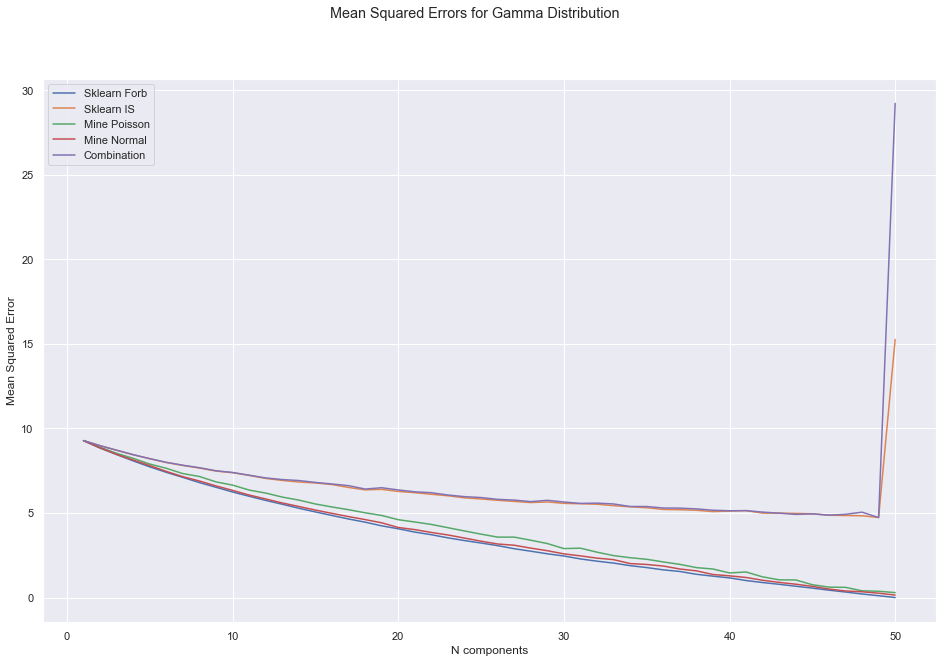

In [61]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb")
ax_1.plot(np.arange(1, 51), 
                  errorssk2, label="Sklearn IS")
ax_1.plot(np.arange(1, 51), 
                  errorsmyPo, label="Mine Poisson")
ax_1.plot(np.arange(1, 51), 
                  errorsmyNormal, label="Mine Normal")
#ax_1.plot(np.arange(1, 51), 
#                  errorsmy, label="Mine Gamma")
ax_1.plot(np.arange(1, 51), 
                  errorsmy2, label="Combination")
ax_1.legend(loc=0)

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Gamma Distribution')
fig_1.savefig('MeanSquaredErrorsForNMFGamma1.pdf')

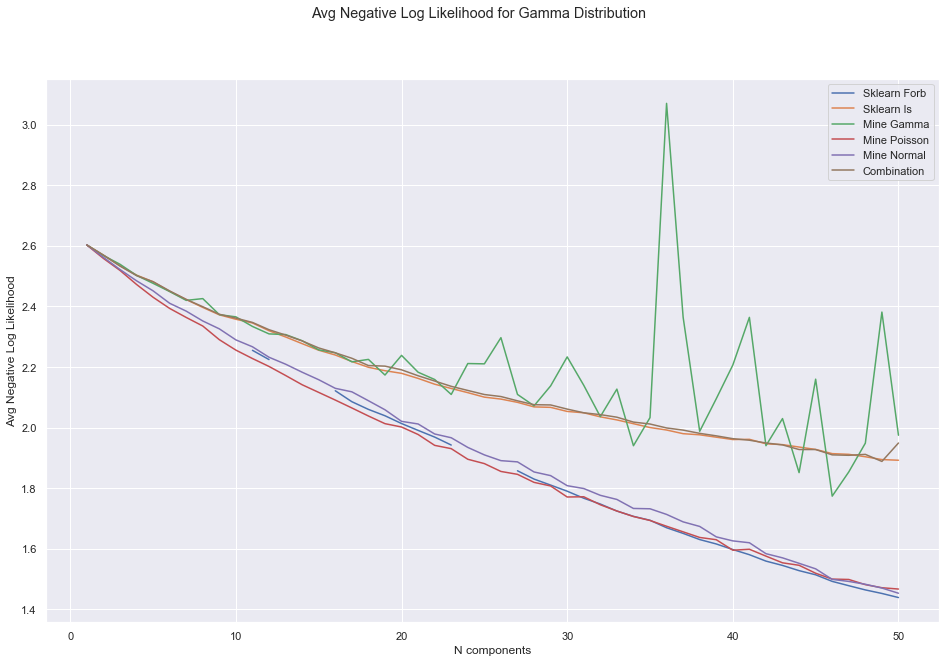

In [67]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn Forb")
ax_1.plot(np.arange(1, 51), 
                  lsk2, label="Sklearn Is")
ax_1.plot(np.arange(1, 51), 
                  lmy, label="Mine Gamma")
ax_1.plot(np.arange(1, 51), 
                  lmyPo, label="Mine Poisson")
ax_1.plot(np.arange(1, 51), 
                  lmyNormal, label="Mine Normal")
ax_1.plot(np.arange(1, 51), 
                  lmy2, label="Combination")
ax_1.legend(loc=0)

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Gamma Distribution')
fig_1.savefig('AverageNegLogLikelihoodForNMFGamma1.pdf')

#### Distribution compared to Sklearn with 10 components

Original Data mean: 3.7301527448395717 std: 3.0815977694864745
Tansformation Data : 3.767406990976393 std: 1.725925884739486


/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


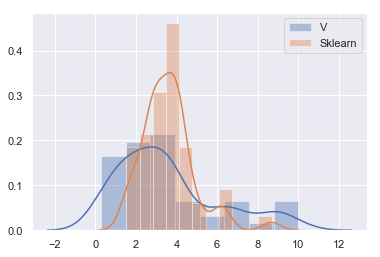

In [68]:
rs = RandomState(76321654)
n = 10
nmfS = nmfsk(n_components=n,random_state=rs)
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_
sns.set(color_codes=True)
sns.distplot(V[4], label ='V')
sns.distplot(Ws.dot(Hs)[4], label='Sklearn')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(Ws.dot(Hs).mean()) + ' std: ' + str(Ws.dot(Hs).std()) )

#### Distribution compared to Mine with 10 components

Original Data mean: 3.7301527448395717 std: 3.0815977694864745
Tansformation Data : 3.8046675427055945 std: 1.9083490132770753


/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


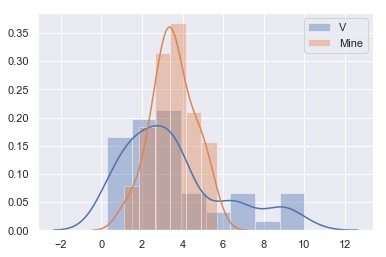

In [70]:
rs = RandomState(76321654)
n = 10
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gamma')
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(V[4], label = 'V')
sns.distplot(W.dot(H)[4], label ='Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

Original Data mean: 3.7301527448395717 std: 3.0815977694864745
Tansformation Data : 3.7301527448395717 std: 1.6401221018601677


/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


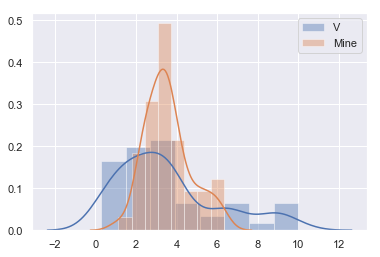

In [72]:
rs = RandomState(76321654)
n = 10
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'poisson')
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(V[4], label = 'V')
sns.distplot(W.dot(H)[4], label ='Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

Original Data mean: 3.7301527448395717 std: 3.0815977694864745
Tansformation Data : 3.762780063060295 std: 1.7080352398839256


/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


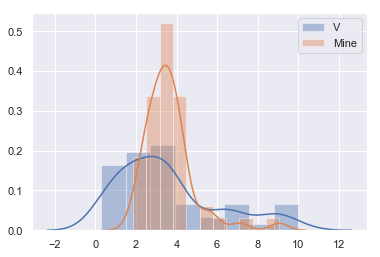

In [75]:
rs = RandomState(76321654)
n = 10
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gaussian')
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(V[4], label = 'V')
sns.distplot(W.dot(H)[4], label ='Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

#### Distribution compared to Combination with 10 components

Original Data mean: 3.7301527448395717 std: 3.0815977694864745
Tansformation Data : 3.742739621885575 std: 1.5441971612921832


/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


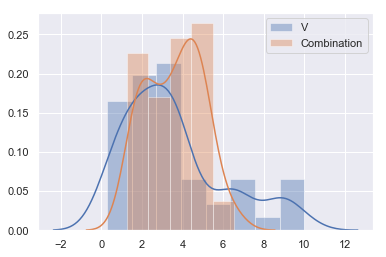

In [71]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'gamma')
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_
sns.set(color_codes=True)
sns.distplot(V[4],label='V')
sns.distplot(W2.dot(H2)[4], label = 'Combination')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W2.dot(H2).mean()) + ' std: ' + str(W2.dot(H2).std()) )